In [28]:
import pandas as pd 
import numpy as np

# Read in the data
df = pd.read_csv('data/model_data_v1.csv')
feature_importances = pd.read_csv('data/feature_importance.csv')
raw_agr_data = pd.read_csv('data/cf_agrAppend_va2_10_14_2022.csv')
raw_acxiomn_data = pd.read_csv('data/cf_acxiomAppend_va2_10_14_2022.csv')

C:\Users\cayde\AppData\Local\Temp\ipykernel_16008\3724088620.py:7: DtypeWarning: Columns (12,66) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_agr_data = pd.read_csv('data/cf_agrAppend_va2_10_14_2022.csv')


In [12]:
# rename columns to match the data
feature_importances.columns = ['feature', 'importance']

# normalize the feature importances
feature_importances['importance'] = feature_importances['importance'] / feature_importances['importance'].sum()

In [43]:
# for the attribute 'DEMO_OWN OR RENT_O_agr' what is its correlation to y column which is 'is_suicide'. import any nessicary libs. print it out with nice formating
print('#1 feature importance "DEMO_OWN OR RENT_O_agr" corr with y: ' + str(df['DEMO_OWN OR RENT_O_agr'].corr(df['is_suicide'])))

# # for the attribute 'DEMO_TYPE OF DWELLING_S_agr' what is its correlation to y column which is 'is_suicide'. import any nessicary libs
# print('DEMO_OWN OR RENT_R_agr corr with y: ' + str(df['DEMO_OWN OR RENT_R_agr'].corr(df['is_suicide'])))

# for the attribute 'DEMO_TYPE OF DWELLING_S_agr' what is its correlation to y column which is 'is_suicide'. import any nessicary libs
print('DEMO_TYPE OF DWELLING_S_agr corr with y: ' + str(df['DEMO_TYPE OF DWELLING_S_agr'].corr(df['is_suicide'])))

# for the attribute 'RESIDENTIAL_agr' what is its correlation to y column which is 'is_suicide'. import any nessicary libs
print('RESIDENTIAL_agr corr with y: ' + str(df['RESIDENTIAL_agr'].corr(df['is_suicide'])))

# for the attribute 'Economic Stability Indicator_acxiom' what is its correlation to y column which is 'is_suicide'. import any nessicary libs
print('Economic Stability Indicator_acxiom corr with y: ' + str(df['Economic Stability Indicator_acxiom'].corr(df['is_suicide'])))

# for the attribute 'Home Owner / Renter - 100%_O_acxiom' what is its correlation to y column which is 'is_suicide'. import any nessicary libs
print('#5 feature importance "Home Owner / Renter - 100%_O_acxiom" corr with y: ' + str(df['Home Owner / Renter - 100%_O_acxiom'].corr(df['is_suicide'])))

# 


#1 feature importance "DEMO_OWN OR RENT_O_agr" corr with y: -0.7396898288033975
DEMO_TYPE OF DWELLING_S_agr corr with y: -0.7317119737724865
RESIDENTIAL_agr corr with y: -0.3258188614558639
Economic Stability Indicator_acxiom corr with y: 0.27587038727023133
#5 feature importance "Home Owner / Renter - 100%_O_acxiom" corr with y: -0.467239617962959


In [45]:
# create a new dataframe called deep dive
deep_dive = pd.DataFrame()

# add the column 'source_id' to the deep dive dataframe
deep_dive['source_id'] = df['source_id']

# add the column 'target_id' to the deep dive dataframe
deep_dive['is_suicide'] = df['is_suicide']

# add the column 'DEMO_OWN OR RENT_O_agr' to the deep dive dataframe
deep_dive['DEMO_OWN OR RENT_O_agr'] = df['DEMO_OWN OR RENT_O_agr']

# join the column 'DEMO_OWN OR RENT' to the deep dive dataframe from the dataframe 'raw_agr_data' join on the column 'source_id'
deep_dive = deep_dive.join(raw_agr_data[['source_id', 'DEMO_OWN OR RENT']].set_index('source_id'), on='source_id')

deep_dive = deep_dive.join(raw_agr_data[['source_id', 'DEMO_TYPE OF DWELLING']].set_index('source_id'), on='source_id')

# join the column 'RESIDENTIAL' to the deep dive dataframe from the dataframe 'raw_agr_data' join on the column 'source_id'
deep_dive = deep_dive.join(raw_agr_data[['source_id', 'RESIDENTIAL']].set_index('source_id'), on='source_id')

# join the column 'Economic Stability Indicator' to the deep dive dataframe from the dataframe 'raw_acxiomn_data' join on the column 'source_id'
deep_dive = deep_dive.join(raw_acxiomn_data[['source_id', 'IBE9350']].set_index('source_id'), on='source_id')
# reaname the column 'IBE9350' to 'Economic Stability Indicator_acxiom'
deep_dive.rename(columns={'IBE9350': 'Economic Stability Indicator'}, inplace=True)

# 'IBE7606_01'
# join the column 'IBE7606_01' to the deep dive dataframe from the dataframe 'raw_acxiomn_data' join on the column 'source_id'
deep_dive = deep_dive.join(raw_acxiomn_data[['source_id', 'IBE7606_01']].set_index('source_id'), on='source_id')
# rename the column 'IBE7606_01' to 'Home Owner / Renter - 100%'
deep_dive = deep_dive.rename(columns={'IBE7606_01': 'Home Owner / Renter - 100%'})


## deep dive "DEMO_OWN OR RENT" 

Number of nulls in the column 'DEMO_OWN OR RENT' in the deep dive dataframe: 12781
Percentage nulls: 0.5728821156432093
Value counts of the combination of the columns 'DEMO_OWN OR RENT' and 'target' in the deep dive dataframe:
DEMO_OWN OR RENT  is_suicide
O                 False         8029
                  True           911
R                 False           32
                  True            80
U                 False          289
                  True           188
Name: is_suicide, dtype: int64
Ratio of when the column 'DEMO_OWN OR RENT' have value 'O' and the target is 0: 89.81%


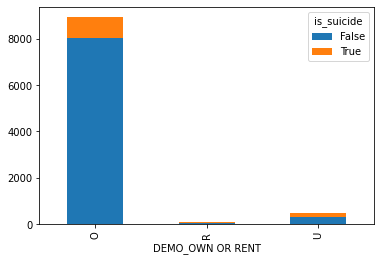

In [20]:
# how many nulls in the column 'DEMO_OWN OR RENT' in the deep dive dataframe. print this out with nice formating
print(f"Number of nulls in the column 'DEMO_OWN OR RENT' in the deep dive dataframe: {deep_dive['DEMO_OWN OR RENT'].isnull().sum()}")
# what percentage of the column 'DEMO_OWN OR RENT' in the deep dive dataframe is null. print this out with nice formating
print(f"Percentage nulls: {deep_dive['DEMO_OWN OR RENT'].isnull().sum() / len(deep_dive['DEMO_OWN OR RENT'])}")

# # value counts of the column 'DEMO_OWN OR RENT' in the deep dive dataframe. print this out with nice formating
# print(f"Value counts of the column 'DEMO_OWN OR RENT' in the deep dive dataframe: {deep_dive['DEMO_OWN OR RENT'].value_counts()}")

# what are the value counts of the combination of the columns 'DEMO_OWN OR RENT' and 'target' in the deep dive dataframe. print this out with nice formating
print(f"Value counts of the combination of the columns 'DEMO_OWN OR RENT' and 'target' in the deep dive dataframe:")
print(deep_dive.groupby(['DEMO_OWN OR RENT', 'is_suicide'])['is_suicide'].count())

# create a visualization of the value counts of the combination of the columns 'DEMO_OWN OR RENT' and 'target' in the deep dive dataframe
deep_dive.groupby(['DEMO_OWN OR RENT', 'is_suicide'])['is_suicide'].count().unstack().plot(kind='bar', stacked=True)

# what is the ratio of when the column 'DEMO_OWN OR RENT' have value 'O' and the target is 1. print this out with nice formating lke 
print(f"Ratio of when the column 'DEMO_OWN OR RENT' have value 'O' and the target is 0: {deep_dive[(deep_dive['DEMO_OWN OR RENT'] == 'O') & (deep_dive['is_suicide'] == 0)].shape[0] / deep_dive[deep_dive['DEMO_OWN OR RENT'] == 'O'].shape[0] * 100:.2f}%")


##  "DEMO_OWN OR RENT" summary
description -meaning u own a home and do not rent <br>
Stats:<br>
norm_feature importance: 0.2477858563<br>
Corr w/ is_suicide: -0.7396898288033975<br>
My Interpretation: <br>
"DEMO_OWN OR RENT" is the most important feature of the first run. it has a very high negative correlation with is_suicide. In our dataset 90% of home owners are not part of the suicide population. this is having huge impact on the model and we need to make sure this is truly representative of the greater population and not just poor sampling in our dataset. how do we approach this and verify that is not the case i am not sure.<br>

agr has bad fill rates on suicide pop. could the model be picking up on this and not the data present. <br>
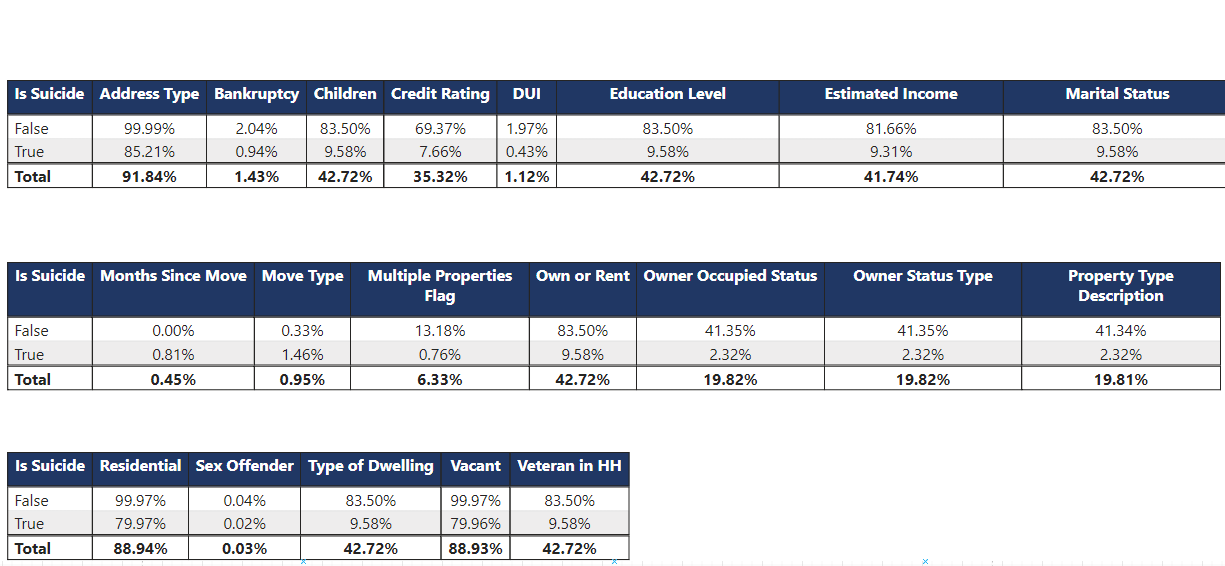 <br>
how to read this chart  <br>
total - what percentage of total data set was filled for this attribute  <br>
true - what percentage of suicides in dataset was filled for this attribute <br>
fasle - what percentage of living in dataset was filled for this attribute <br>

find another attribute to look at this data and see how accurate it is 

## deep dive "DEMO_TYPE OF DWELLING"

Number of nulls in the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe: 12785
Percentage of nulls in the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe: 0.57295868064892
Value counts of the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe: S    9270
U     145
M     114
Name: DEMO_TYPE OF DWELLING, dtype: int64
Value counts of the combination of the columns 'DEMO_TYPE OF DWELLING' and 'target' in the deep dive dataframe: DEMO_TYPE OF DWELLING  is_suicide
M                      False           57
                       True            57
S                      False         8156
                       True          1114
U                      False          137
                       True             8
Name: is_suicide, dtype: int64


<AxesSubplot:xlabel='DEMO_TYPE OF DWELLING'>

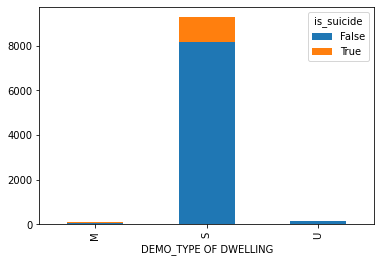

In [24]:
# how many nulls in the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe. print this out with nice formating
print(f"Number of nulls in the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe: {deep_dive['DEMO_TYPE OF DWELLING'].isnull().sum()}")

# what percentage of the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe is null. print this out with nice formating
print(f"Percentage of nulls in the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe: {deep_dive['DEMO_TYPE OF DWELLING'].isnull().sum() / len(deep_dive['DEMO_TYPE OF DWELLING'])}")

# value counts of the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe. print this out with nice formating
print(f"Value counts of the column 'DEMO_TYPE OF DWELLING' in the deep dive dataframe: {deep_dive['DEMO_TYPE OF DWELLING'].value_counts()}")

# what are the value counts of the combination of the columns 'DEMO_TYPE OF DWELLING' and 'target' in the deep dive dataframe. print this out with nice formating
print(f"Value counts of the combination of the columns 'DEMO_TYPE OF DWELLING' and 'target' in the deep dive dataframe: {deep_dive.groupby(['DEMO_TYPE OF DWELLING', 'is_suicide'])['is_suicide'].count()}")

# create a visualization of the value counts of the combination of the columns 'DEMO_TYPE OF DWELLING' and 'target' in the deep dive dataframe
deep_dive.groupby(['DEMO_TYPE OF DWELLING', 'is_suicide'])['is_suicide'].count().unstack().plot(kind='bar', stacked=True)


description - meaning you live in a single family household<br>
Stats:<br>
norm_feature importance: 0.1407162138<br>
Corr w/ is_suicide: -0.7317119737724865<br>
My Interpretation: <br>
"DEMO_TYPE OF DWELLING_S_agr" is the second most important feature in the first run, with a relatively high negative correlation with is_suicide. we can see the same trend as found 'DEMO_OWN OR RENT' single family homes in our data set have 90% living and only 10% suicide. how do we approach this and verify that is not the case i am not sure.<br>

more of the same a attribute above

## deep dive  'RESIDENTIAL'

In [27]:
# how many nulls in the column 'RESIDENTIAL' in the deep dive dataframe. print this out with nice formating
print(f"Number of nulls in the column 'RESIDENTIAL' in the deep dive dataframe: {deep_dive['RESIDENTIAL'].isnull().sum()}")
# what percentage of the column 'RESIDENTIAL' in the deep dive dataframe is null. print this out with nice formating
print(f"Percentage of nulls in the column 'RESIDENTIAL' in the deep dive dataframe: {deep_dive['RESIDENTIAL'].isnull().sum() / len(deep_dive['RESIDENTIAL'])}")

# value counts of the column 'RESIDENTIAL' in the deep dive dataframe. print this out with nice formating
print(f"Value counts of the column 'RESIDENTIAL' in the deep dive dataframe:\n {deep_dive['RESIDENTIAL'].value_counts()}")
# what are the value counts of the combination of the columns 'RESIDENTIAL' and 'target' in the deep dive dataframe. print this out with nice formating
print(f"Value counts of the combination of the columns 'RESIDENTIAL' and 'target' in the deep dive dataframe: {deep_dive.groupby(['RESIDENTIAL', 'is_suicide'])['is_suicide'].count()}")

Number of nulls in the column 'RESIDENTIAL' in the deep dive dataframe: 2468
Percentage of nulls in the column 'RESIDENTIAL' in the deep dive dataframe: 0.11056356957261894
Value counts of the column 'RESIDENTIAL' in the deep dive dataframe: Y    19585
N      269
Name: RESIDENTIAL, dtype: int64
Value counts of the combination of the columns 'RESIDENTIAL' and 'target' in the deep dive dataframe: RESIDENTIAL  is_suicide
N            False           38
             True           231
Y            False         9959
             True          9626
Name: is_suicide, dtype: int64



description - this is the address type that age pulls<br>
Stats:<br>
norm_feature importance: 0.0596391311<br>
Corr w/ is_suicide: -0.3258188614558639<br>
My Interpretation: <br>
AGR documentation is not lacking on what 'RESIDENTIAL' means im pretty sure its pull from the address and an evaluation if someone owns a home or lives in a big apartment building. 'RESIDENTIAL' is the third most important feature. not as clear from the data itself why 'RESIDENTIAL' is important. could be the imbalance in the 'N' class in terms of suicide as its a 6 to 1 more suicides than not. 

## deep dive 'Economic Stability Indicator'

Number of nulls in the column 'Economic Stability Indicator' in the deep dive dataframe: 4962
Percentage of nulls in the column 'Economic Stability Indicator' in the deep dive dataframe: 0.22213268869191513


<AxesSubplot:title={'center':'ratio of suicides(true) to alive(false)'}, xlabel='Economic Stability Indicator'>

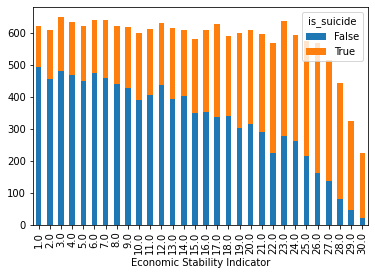

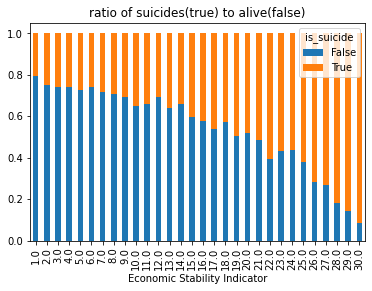

In [42]:
# how many nulls in the column 'Economic Stability Indicator' in the deep dive dataframe. print this out with nice formating
print(f"Number of nulls in the column 'Economic Stability Indicator' in the deep dive dataframe: {deep_dive['Economic Stability Indicator'].isnull().sum()}")
# what percentage of the column 'Economic Stability Indicator' in the deep dive dataframe is null. print this out with nice formating
print(f"Percentage of nulls in the column 'Economic Stability Indicator' in the deep dive dataframe: {deep_dive['Economic Stability Indicator'].isnull().sum() / len(deep_dive['Economic Stability Indicator'])}")

# create a visualization of the value counts of the combination of the columns 'Economic Stability Indicator' and 'target' in the deep dive dataframe
deep_dive.groupby(['Economic Stability Indicator', 'is_suicide'])['is_suicide'].count().unstack().plot(kind='bar', stacked=True)

# make a visualization of the ratio for each value of the column 'Economic Stability Indicator' and the target is 1. drop all rows where the value is nan. make a bar chart
# first calculate the ratio for each value of the column 'Economic Stability Indicator' and the target is 1. drop all rows where the value is nan. save this to a variable
ratio = deep_dive.groupby(['Economic Stability Indicator', 'is_suicide'])['is_suicide'].count().unstack().dropna().apply(lambda x: x / x.sum(), axis=1)
# make a bar chart of the ratio for each value of the column 'Economic Stability Indicator' and the target is 1. drop all rows where the value is nan
ratio.plot(kind='bar', stacked=True, title='ratio of suicides(true) to alive(false)')

# # for each value in the column 'Economic Stability Indicator' in the deep dive dataframe, what is the ratio of the column 'target' having value 1 to 0. print this out with nice formating and as a percentage
# for value in deep_dive['Economic Stability Indicator'].unique():
#     if pd.isnull(value):
#         print(f"Ratio of when the column 'Economic Stability Indicator' have value 'nan' and the target is 1: nan")
#     else:
#         print(f"Ratio of when the column 'Economic Stability Indicator' have value '{value}' and the target is 1: {deep_dive[(deep_dive['Economic Stability Indicator'] == value) & (deep_dive['is_suicide'] == 1)].shape[0] / deep_dive[deep_dive['Economic Stability Indicator'] == value].shape[0] * 100:.2f}%")

description - a numeric indicator of how economically stable a person is (01 = Most Likely Economically Stable to 10 = Least Likely Economically Stable)<br>
Stats:<br>
norm_feature importance: 0.0569559519<br>
Corr w/ is_suicide: 0.27587038727023133<br>
My Interpretation: <br>
"Economic Stability Indicator_acxiom" is a numeric indicator of how economically stable a person is, and it is the fourth most important feature in the first run. it has a positive correlation with is_suicide. as you can see above the more economically unstable someone is the higher rate of suicides observations can be found in the dataset. I think this is a good factor that generalies well to the greater population. 

## deep dive 'Home Owner / Renter - 100%'

Number of nulls in the column 'Home Owner / Renter - 100%' in the deep dive dataframe: 1311
Percentage of nulls in the column 'Home Owner / Renter - 100%' in the deep dive dataframe: 0.05860527492177023
Value counts of the column 'Home Owner / Renter - 100%' in the deep dive dataframe: O    16518
R     4541
Name: Home Owner / Renter - 100%, dtype: int64
Value counts of the combination of the columns 'Home Owner / Renter - 100%' and 'target' in the deep dive dataframe: Home Owner / Renter - 100%  is_suicide
O                           False         9657
                            True          6861
R                           False          341
                            True          4200
Name: is_suicide, dtype: int64
Ratio of when the column 'Home Owner / Renter - 100%' have value 'R' and the target is 1: 92.49%


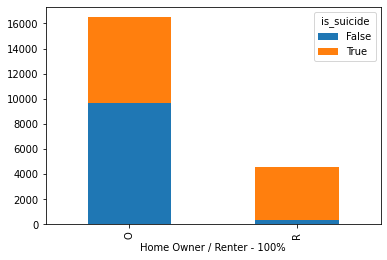

In [47]:

# how many nulls in the column 'Home Owner / Renter - 100%' in the deep dive dataframe. print this out with nice formating
print(f"Number of nulls in the column 'Home Owner / Renter - 100%' in the deep dive dataframe: {deep_dive['Home Owner / Renter - 100%'].isnull().sum()}")
# what percentage of the column 'Home Owner / Renter - 100%' in the deep dive dataframe is null. print this out with nice formating
print(f"Percentage of nulls in the column 'Home Owner / Renter - 100%' in the deep dive dataframe: {deep_dive['Home Owner / Renter - 100%'].isnull().sum() / len(deep_dive['Home Owner / Renter - 100%'])}")

# value counts of the column 'Home Owner / Renter - 100%' in the deep dive dataframe. print this out with nice formating
print(f"Value counts of the column 'Home Owner / Renter - 100%' in the deep dive dataframe: {deep_dive['Home Owner / Renter - 100%'].value_counts()}")
# what are the value counts of the combination of the columns 'Home Owner / Renter - 100%' and 'target' in the deep dive dataframe. print this out with nice formating
print(f"Value counts of the combination of the columns 'Home Owner / Renter - 100%' and 'target' in the deep dive dataframe: {deep_dive.groupby(['Home Owner / Renter - 100%', 'is_suicide'])['is_suicide'].count()}")

# create a visualization of the value counts of the combination of the columns 'Home Owner / Renter - 100%' and 'target' in the deep dive dataframe
deep_dive.groupby(['Home Owner / Renter - 100%', 'is_suicide'])['is_suicide'].count().unstack().plot(kind='bar', stacked=True)

print(f"Ratio of when the column 'Home Owner / Renter - 100%' have value 'R' and the target is 1: {deep_dive[(deep_dive['Home Owner / Renter - 100%'] == 'R') & (deep_dive['is_suicide'] == 1)].shape[0] / deep_dive[deep_dive['Home Owner / Renter - 100%'] == 'R'].shape[0] * 100:.2f}%")


as we can see when someone is a renter we have 90% examples of suicide. we need to be sure this is truly representative of the larger population. this is the 5th most important feature according to the model.<br>
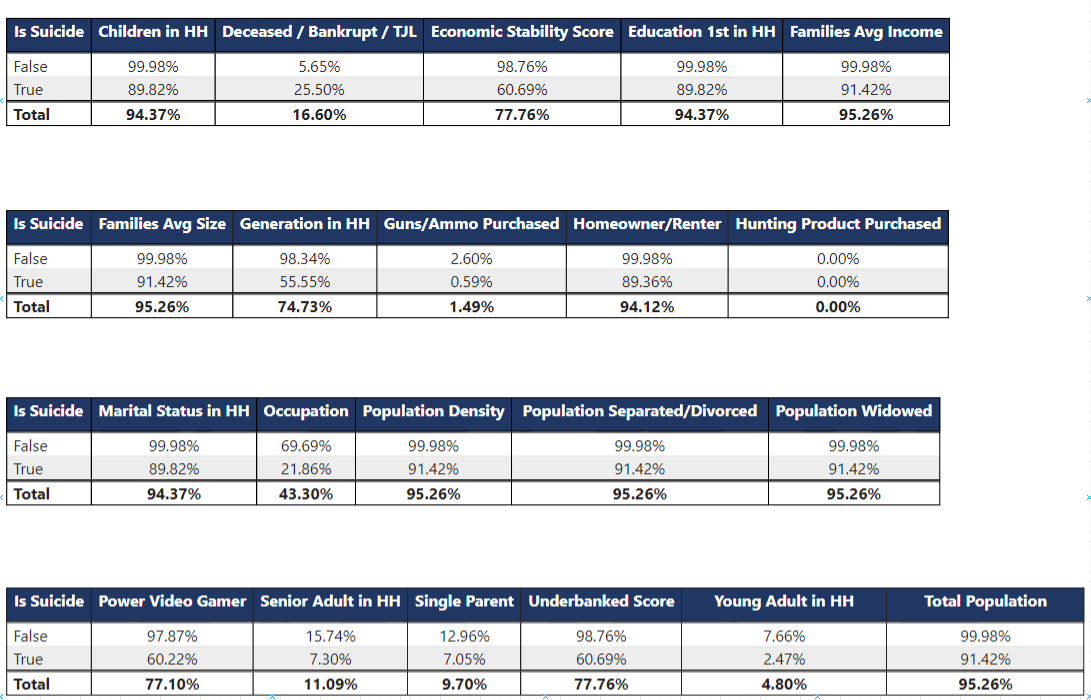

# Key Takeaways:
- 4 of the 5 top features are housing ones. we need to do the following things about this: <br>
- - we should reduce all of these similar attributes into one conglomerate attribute to reduce dimensionality as they are all referencing the same thing. <br>
- - we need to make sure these attributes aling with each other. i.e. what is the amount of rows that one attribute claims the person is a home owner and the other claims they are a renter<br>
- we need to create a new pipeline sort of like the confidence metric that compares all similar columns in the dataframe and reduces dimensinality and removes confliting data

Then:
- run a new model with these changes